<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W9D2_DailyChallange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install openai
!pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


In [14]:
!pip install anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 11.0 MB/s eta 0:00:00


In [1]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d zeesolver/consumer-behavior-and-shopping-habits-dataset

Dataset URL: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset
License(s): CC0-1.0
  0% 0.00/146k [00:00<?, ?B/s]
100% 146k/146k [00:00<00:00, 98.8MB/s]


In [3]:
!unzip consumer-behavior-and-shopping-habits-dataset.zip

Archive:  consumer-behavior-and-shopping-habits-dataset.zip
  inflating: shopping_behavior_updated.csv  
  inflating: shopping_trends.csv     


In [7]:
import pandas as pd


# , encoding='latin1'
shopping_data = pd.read_csv('shopping_behavior_updated.csv')
print(shopping_data.head())
shopping_data2 = pd.read_csv('shopping_trends.csv')
print(shopping_data2.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [12]:
print(shopping_data.columns)
print(len(shopping_data.columns))

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')
18


In [11]:
print(shopping_data2.columns)
print(len(shopping_data2.columns))

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')
19


In [16]:
import anthropic
import pandas as pd


# Replace 'your_api_key' with your actual Claude API key
api_key = "My API Key"
# Initialize the Claude client with your API key
client = anthropic.Client(api_key=api_key)
# Choose the appropriate Claude model for text-based analysis
model = "claude-3-opus-20240229"
# Formulate a question to ask Claude
question = f'''You are working as a chief data analyst in a famous startup. Your boss gave you the following task: to analyze the dataset and provide meaningful insights.
Below you can find the first lines of the dataframe {shopping_data2.head(10).to_string()}'''
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

As a chief data analyst, I would approach this task by first exploring the dataset to gain a high-level understanding of its structure and contents. Then, I would perform a more in-depth analysis to uncover meaningful insights and patterns. Here are some initial observations and potential areas for further investigation:

1. Customer Demographics:
   - Analyze the distribution of customer age and gender to understand the target audience.
   - Identify any correlations between age, gender, and purchasing behavior.

2. Product Categories:
   - Determine the most popular product categories based on purchase frequency.
   - Investigate if there are any gender or age-specific preferences for certain categories.

3. Purchasing Behavior:
   - Calculate the average purchase amount and identify any outliers or high-value customers.
   - Analyze the frequency of purchases (e.g., weekly, fortnightly, quarterly, annually) to understand customer loyalty and retention.
   - Explore the relationship 

As AI give us some insights we can highlight 3 key points we want to explore in the dataset:

1.Customer Demographics

2.Product Categories

3.Seasonality

Thats should help us to understand which products are the most popular and who is the main client.

In [17]:
shopping_data2.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [18]:
shopping_data2.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [19]:
shopping_data2.duplicated().sum()

0

As we don't have any duplicates and null values, we can start our analysis.

**1.Customer Demographics**

In [20]:
shopping_data2['Age'].unique()

array([55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 30, 61, 65, 64, 25, 52,
       66, 31, 56, 18, 38, 54, 33, 36, 35, 29, 70, 69, 67, 20, 39, 42, 68,
       49, 59, 47, 40, 41, 48, 22, 24, 44, 37, 58, 32, 62, 51, 28, 43, 34,
       23, 60])

In [21]:
shopping_data2['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [57]:
shopping_data2['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

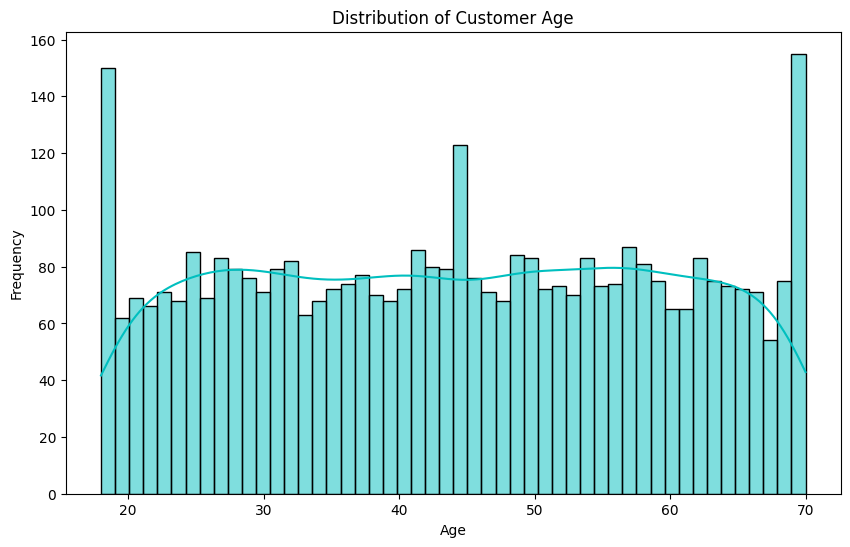

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze the distribution of customer age and gender
# Plotting age distribution
plt.figure(figsize=(10, 6))
sns.histplot(shopping_data2['Age'], bins=50, kde=True, color='c')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-34-8c740e76be41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=shopping_data2, palette=colors)


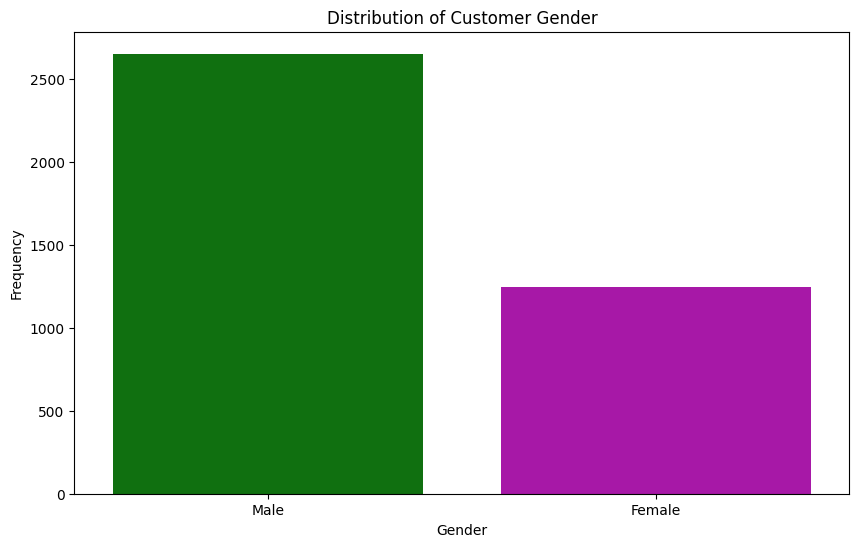

In [34]:
# Plotting gender distribution

colors = ['green', 'm']
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=shopping_data2, palette=colors)
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

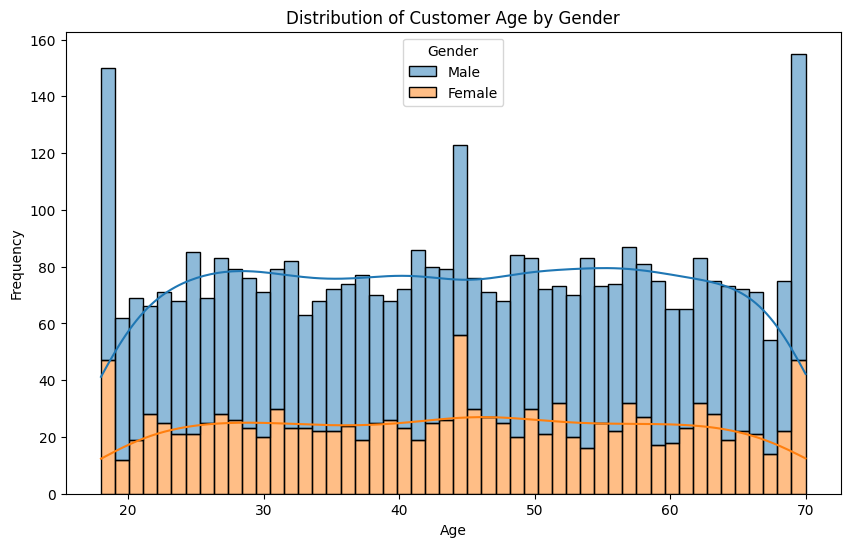

In [37]:
# Plotting age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=shopping_data2, x='Age', hue='Gender', multiple='stack', bins=50, kde=True)
plt.title('Distribution of Customer Age by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

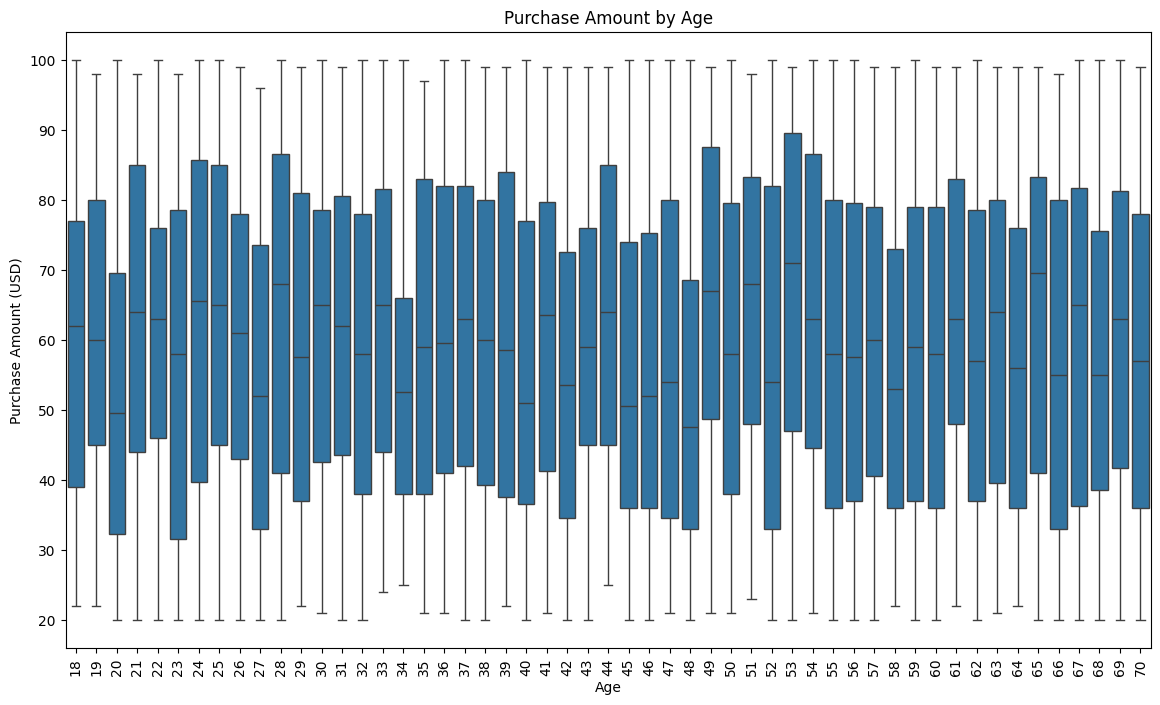

In [39]:
# Boxplot of Purchase Amount by Age
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age', y='Purchase Amount (USD)', data=shopping_data2)
plt.title('Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.show()

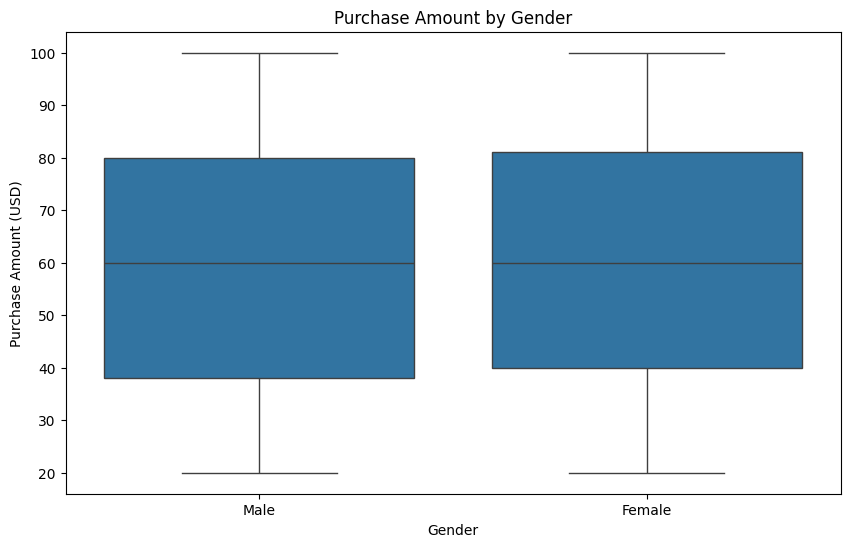

In [40]:
# Boxplot of Purchase Amount by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=shopping_data2)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

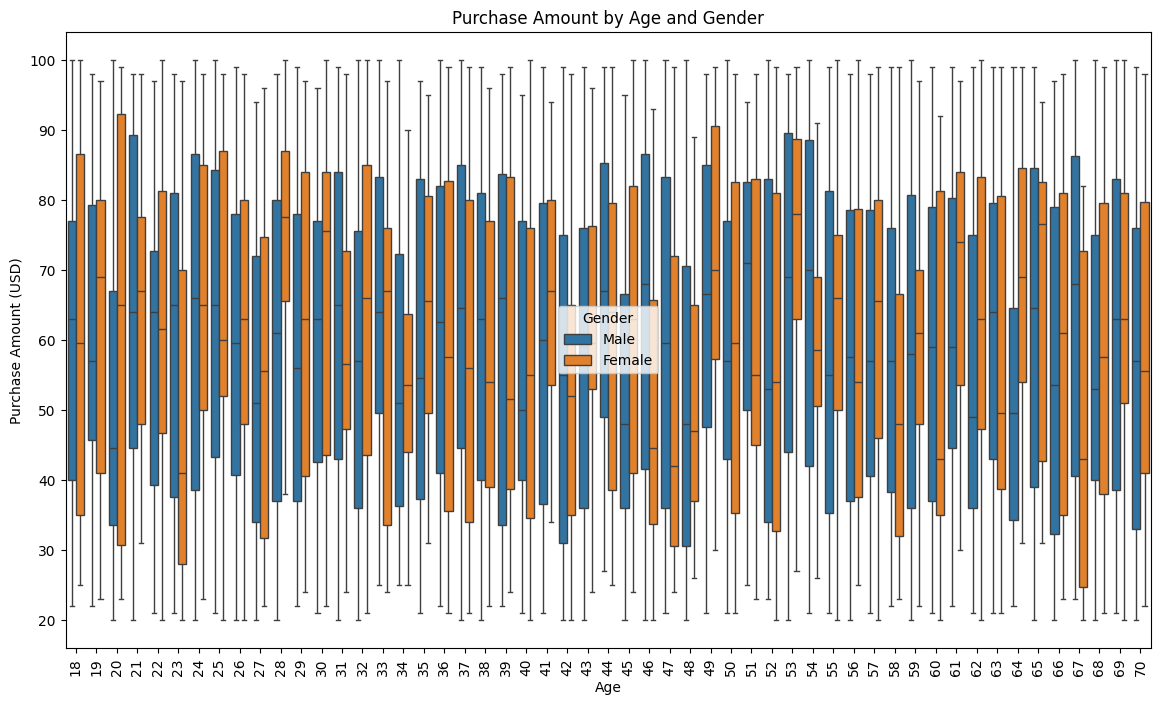

In [48]:
# Boxplot of Purchase Amount by Age and Gender

plt.figure(figsize=(14, 8))
sns.boxplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=shopping_data2)
plt.title('Purchase Amount by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.show()


Correlation Matrix:
                            Age  Gender_Numeric  Purchase Amount (USD)
Age                    1.000000        0.002763              -0.010424
Gender_Numeric         0.002763        1.000000              -0.014044
Purchase Amount (USD) -0.010424       -0.014044               1.000000


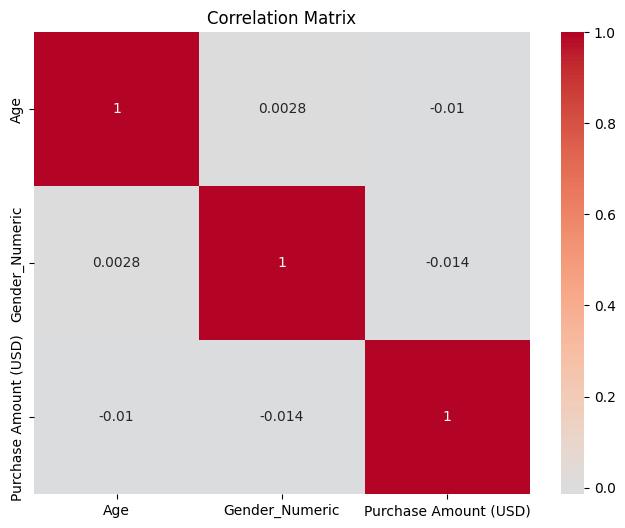

In [44]:
# Statistical correlation analysis
# Convert categorical data to numerical for correlation calculation
shopping_data2['Gender_Numeric'] = shopping_data2['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Calculate correlation matrix
correlation_matrix = shopping_data2[['Age', 'Gender_Numeric', 'Purchase Amount (USD)']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**2.Product Categories**

In [49]:
# Determine the most popular product categories based on purchase frequency
category_counts = shopping_data2['Category'].value_counts()
print(f"Most Popular Product Categories:\n {category_counts}")


Most Popular Product Categories:
 Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


<ipython-input-51-f83c565c5eb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


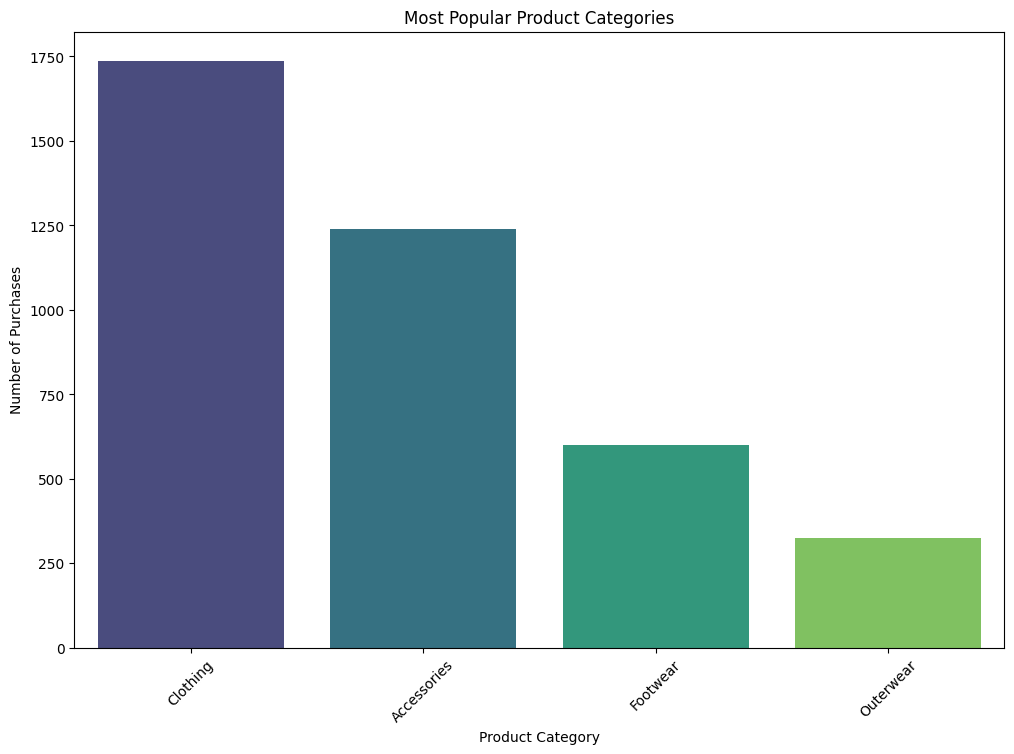

In [51]:
# Plot the most popular product categories
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Most Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

In [52]:
# Investigate gender-specific preferences for certain categories
gender_category_counts = shopping_data2.groupby(['Gender', 'Category']).size().unstack().fillna(0)
print(f"Gender-Specific Preferences:\n {gender_category_counts}")

Gender-Specific Preferences:
 Category  Accessories  Clothing  Footwear  Outerwear
Gender                                              
Female            392       556       199        101
Male              848      1181       400        223


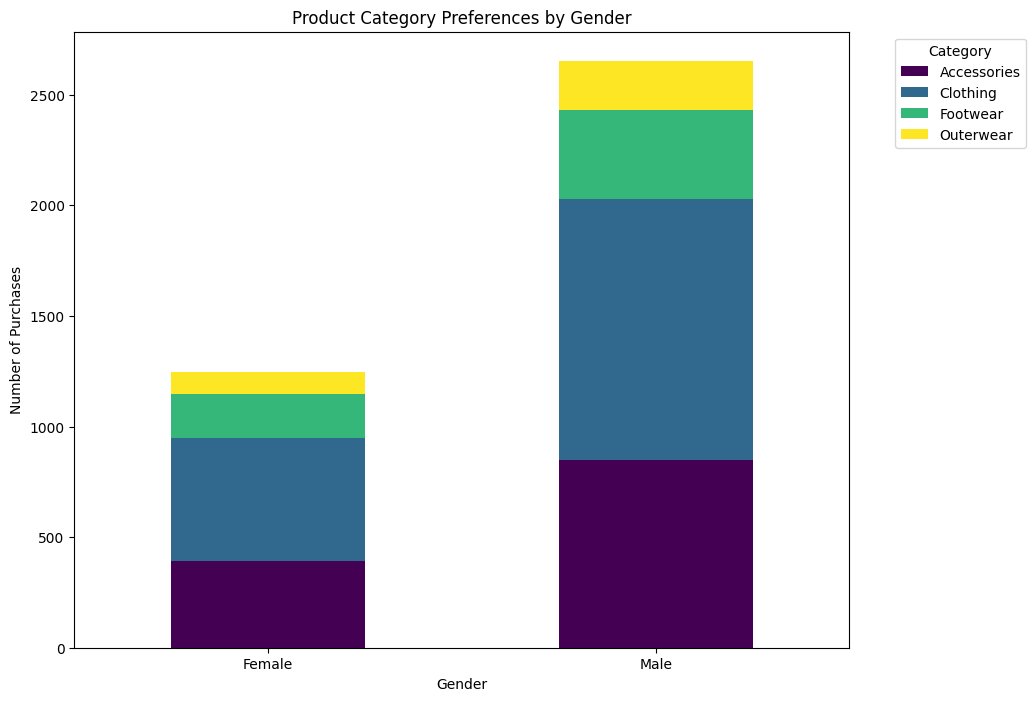

In [54]:
# Plot gender-specific preferences
gender_category_counts.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='viridis')
plt.title('Product Category Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Age-Specific Preferences:
Category   Accessories  Clothing  Footwear  Outerwear
Age Group                                            
0-17                 0         0         0          0
18-24              142       236        61         47
25-34              248       340       115         52
35-44              249       314       109         57
45-54              221       325       139         67
55-64              236       327       123         65
65+                144       195        52         36


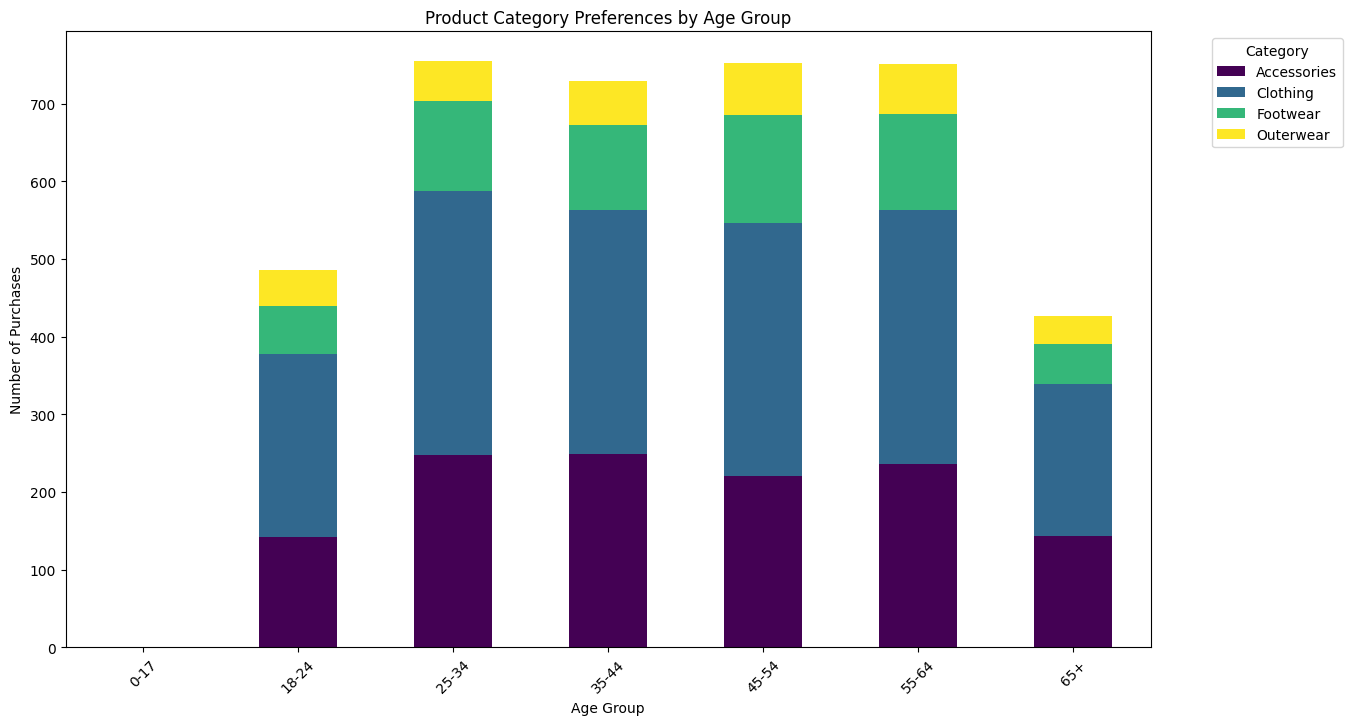

In [55]:
# Investigate age-specific preferences for certain categories
# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 75]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
shopping_data2['Age Group'] = pd.cut(shopping_data2['Age'], bins=bins, labels=labels, right=False)

age_category_counts = shopping_data2.groupby(['Age Group', 'Category']).size().unstack().fillna(0)
print("Age-Specific Preferences:")
print(age_category_counts)

# Plot age-specific preferences
age_category_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Product Category Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**3.Seasonality**

In [59]:
# Analyze the distribution of purchases across different seasons
season_counts = shopping_data2['Season'].value_counts()
print("Purchases Distribution Across Seasons:")
print(season_counts)

Purchases Distribution Across Seasons:
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


<ipython-input-60-26b209a0551a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


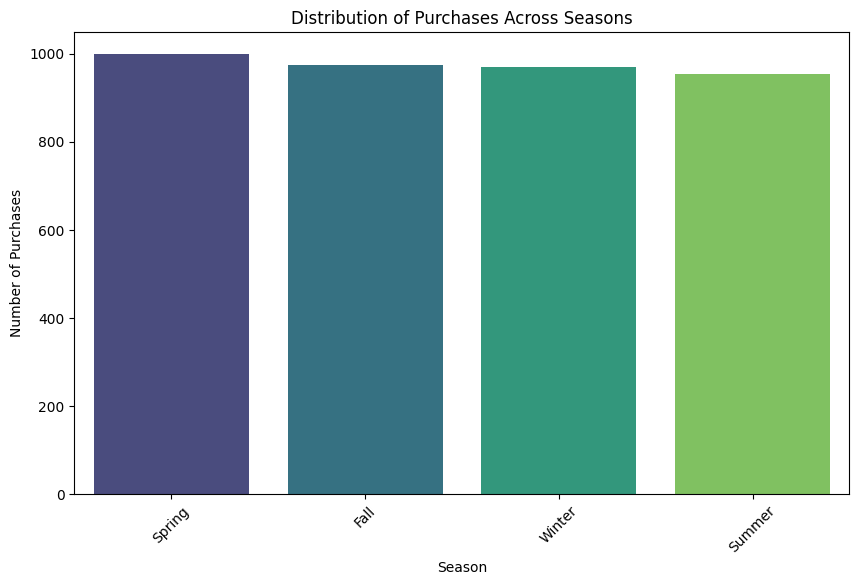

In [60]:
# Plot the distribution of purchases across different seasons
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title('Distribution of Purchases Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

Product Category Popularity During Specific Seasons:
Category  Accessories  Clothing  Footwear  Outerwear
Season                                              
Fall              324       427       136         88
Spring            301       454       163         81
Summer            312       408       160         75
Winter            303       448       140         80


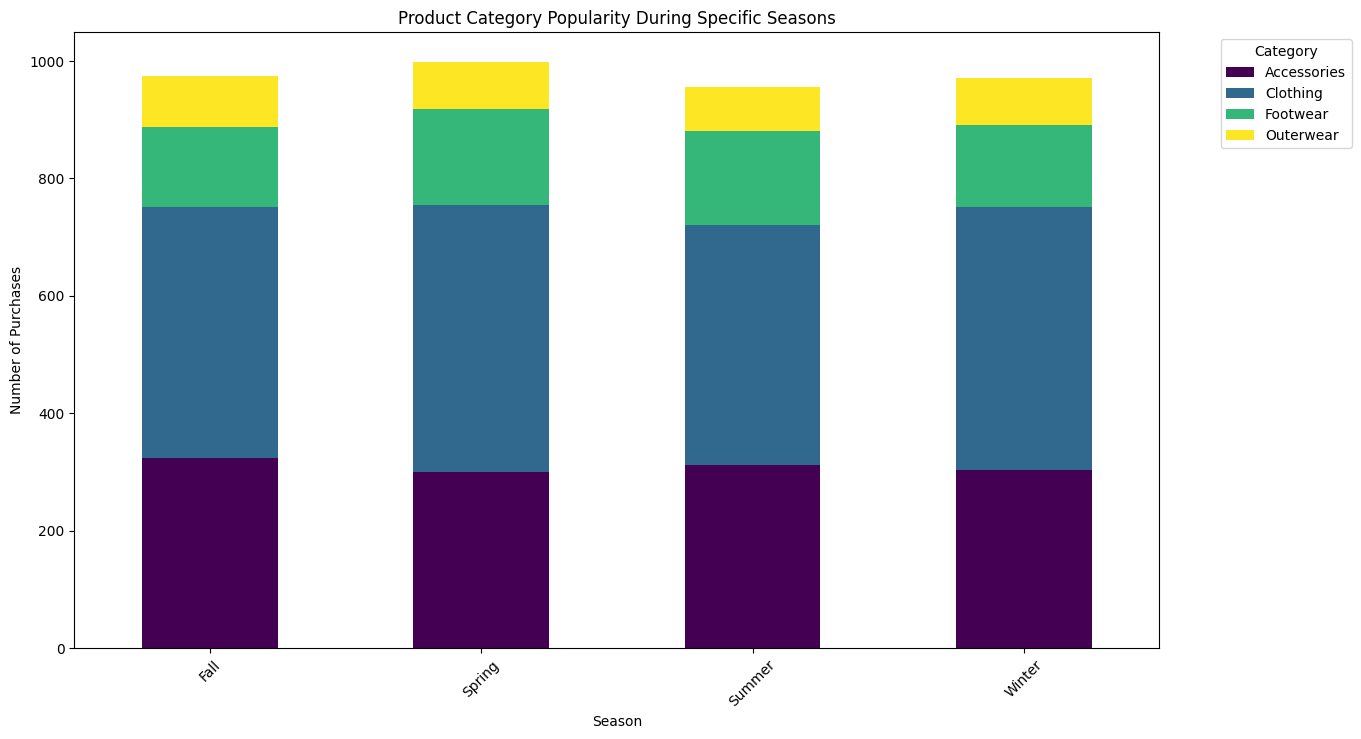

In [61]:
# Determine if certain product categories are more popular during specific seasons
season_category_counts = shopping_data2.groupby(['Season', 'Category']).size().unstack().fillna(0)
print("Product Category Popularity During Specific Seasons:")
print(season_category_counts)

# Plot product category popularity during specific seasons
season_category_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Product Category Popularity During Specific Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insights**

*Demographic Preferences*: Male customers show a higher engagement in shopping, particularly in Clothing and Accessories. Age groups from 18 to 44 are the most active shoppers, especially in Clothing and Accessories.

*Seasonal Trends*: Purchases are distributed fairly evenly across the year, indicating no strong seasonality in overall purchase volume. However, specific categories like Outerwear are more popular in colder seasons, like fall and winter.

*Targeted Marketing*: Marketing strategies can be tailored to focus on the popular product categories and demographic segments. For instance, targeting males with Clothing and Accessories or promoting seasonal items like Outerwear during fall and winter could enhance sales.